# Predicting depression and anxiety in college students during the Argentinean quarantine for the COVID-19 pandemic

# 5 of 5. Predicting anxiety scores in college students using regression

The data was collected for the study entitled "A longitudinal study on depression and anxiety in college students during the first 106-days of the lengthy Argentinean quarantine for the COVID-19 pandemic" by López Steinmetz et al., published in the Journal of Mental Health in 2021. To access the data, visit https://osf.io/2v84n/.

In this Jupyter notebook, regression models, namely linear regression, random forest and support vector machine (SVM) regressors are trained to predict the scores of college students in the State-Trait Anxiety Inventory using the following features as inputs: depression and anxiety scores from the first measurement, three broad quarantine subperiods to which answers were assigned based on the date of response for the first measurement, the sex and age of the participant, and their mental disorder and suicidal history. The performance of the models are evaluated across several metrics and compared with the performance of three dummy/baseline regressors. 

<b>Prior to preprocessing, an initial inspection of the data was performed in the first notebook named '1_Data_intro.ipynb'. Descriptions of each column can also be found in the aforementioned notebook. For additional information about the data, visit https://doi.org/10.1080/09638237.2021.1952952.</b>

<b>Outline</b>
<br>
<br>5.1. Preprocessing the data
<br>5.2. Training the models
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.2.1. Dummy regressors (baselines)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.2.2. Linear regression
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.2.3. Random forest regressor
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5.2.4. SVM regressor
<br>5.3. Comparing the performance of univariate and multivariate models (feature importance)

In [1]:
# Load 'dataset.xlsx' file as pandas DataFrame to keep tabular format
import pandas as pd

data = pd.read_excel('/Users/margaritasison/Downloads/M3.5 Lab Rotation 3/dataset.xlsx', sheet_name=0, header=0) # data = pd.read_excel('Edit string path accordingly', load first sheet, set first row as header)

### 5.1. Preprocessing the data

In [2]:
# Drop columns 'participant' and 'BDEPRESSION'
data = data.drop(['participant', 'BDEPRESSION'], axis=1)

In [3]:
# Convert categorical variables into dummy variables
print("Columns before 'get_dummies' conversion:\n{}".format(list(data.columns)))

data = pd.get_dummies(data)
print("Columns after 'get_dummies' conversion:\n{}".format(list(data.columns)))

Columns before 'get_dummies' conversion:
['ADEPRESSION', 'AANXIETY', 'BANXIETY', 'quarantinesubperiod', 'sex', 'age', 'mentdishist', 'suic']
Columns after 'get_dummies' conversion:
['ADEPRESSION', 'AANXIETY', 'BANXIETY', 'age', 'quarantinesubperiod_quar first', 'quarantinesubperiod_quar second', 'quarantinesubperiod_quar third', 'sex_man', 'sex_woman', 'mentdishist_no', 'mentdishist_yes', 'suic_no', 'suic_yes']


In [4]:
# Convert 'data' DataFrame into a NumPy array to make it compatible with scikit-learn functions
import numpy as np

data = np.array(data)

In [5]:
# Assign features to 'X' and target to 'y'
X = data[:, 1:] # 'ADEPRESSION', 'AANXIETY', 'age', 'quarantinesubperiod_quar first', 'quarantinesubperiod_quar second', 'quarantinesubperiod_quar third', 'sex_man', 'sex_woman', 'mentdishist_no', 'mentdishist_yes', 'suic_no', 'suic_yes'
y = data[:, :1] # 'BANXIETY'

# Run the following lines to check 'X' and 'y':
print("First five rows of 'X':\n", X[0:5], "\nShape of 'X':", X.shape)
print("\nFirst five rows of 'y':\n", y[0:5], "\nShape of 'y':", y.shape)

First five rows of 'X':
 [[33 21 22  1  0  0  0  1  1  0  1  0]
 [21 14 24  1  0  0  0  1  1  0  0  1]
 [20 23 30  1  0  0  0  1  1  0  0  1]
 [41 41 22  1  0  0  0  1  0  1  0  1]
 [37 35 25  1  0  0  0  1  1  0  0  1]] 
Shape of 'X': (1492, 12)

First five rows of 'y':
 [[13]
 [16]
 [ 5]
 [28]
 [17]] 
Shape of 'y': (1492, 1)


In [6]:
# Split 'X' and 'y' into a training set and a test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state=0)

# Run the following lines to check training and test set dimensions:
print("Shape of 'X_train':", X_train.shape, "\nShape of 'y_train':", y_train.shape) # (1119, 12) (1119, 1)
print("Shape of 'X_test':", X_test.shape, "\nShape of 'y_test':", y_test.shape) # (373, 12) (373, 1)

Shape of 'X_train': (1119, 12) 
Shape of 'y_train': (1119, 1)
Shape of 'X_test': (373, 12) 
Shape of 'y_test': (373, 1)


In [7]:
# Assign the features that will be scaled to 'scaled_X_train' and 'scaled_X_test'
scaled_X_train = X_train[:, :3] # 'ADEPRESSION', 'AANXIETY', 'age'
scaled_X_test = X_test[:, :3] # 'ADEPRESSION', 'AANXIETY', 'age'

# Run the following lines to check 'scaled_X_train' and 'scaled_X_test':
print("First five rows of 'scaled_X_train' (before scaling):\n", scaled_X_train[0:5], "\nShape of 'scaled_X_train' (before scaling):", scaled_X_train.shape)
print("\nFirst five rows of 'scaled_X_test' (before scaling):\n", scaled_X_test[0:5], "\nShape of 'scaled_X_test' (before scaling):", scaled_X_test.shape)

First five rows of 'scaled_X_train' (before scaling):
 [[34 18 18]
 [14 39 25]
 [31 28 18]
 [32 31 23]
 [28 40 25]] 
Shape of 'scaled_X_train' (before scaling): (1119, 3)

First five rows of 'scaled_X_test' (before scaling):
 [[40 31 19]
 [17  8 20]
 [38 44 25]
 [12 10 25]
 [34 37 33]] 
Shape of 'scaled_X_test' (before scaling): (373, 3)


In [8]:
# Scale 'ADEPRESSION', 'AANXIETY' and 'age'
from sklearn.preprocessing import QuantileTransformer

qt_norm = QuantileTransformer(output_distribution='normal').fit(scaled_X_train)

scaled_X_train = qt_norm.transform(scaled_X_train)
scaled_X_test = qt_norm.transform(scaled_X_test)

# Run the following lines to check 'scaled_X_train' and 'scaled_X_test':
print("First five rows of 'scaled_X_train' (after scaling):\n", scaled_X_train[0:5], "\nShape of 'scaled_X_train' (after scaling):", scaled_X_train.shape)
print("\nFirst five rows of 'scaled_X_test' (after scaling):\n", scaled_X_test[0:5], "\nShape of 'scaled_X_test' (after scaling):", scaled_X_test.shape)

First five rows of 'scaled_X_train' (after scaling):
 [[ 0.2406714  -0.80395767 -1.77392186]
 [-1.36525737  0.65027359  0.74635093]
 [ 0.02007445 -0.1017956  -1.77392186]
 [ 0.09549215  0.13211302  0.2239158 ]
 [-0.18931001  0.73644248  0.74635093]] 
Shape of 'scaled_X_train' (after scaling): (1119, 3)

First five rows of 'scaled_X_test' (after scaling):
 [[ 0.72987685  0.13211302 -1.17188995]
 [-1.06188413 -1.78000541 -0.74800946]
 [ 0.53653104  1.0707446   0.74635093]
 [-1.60221032 -1.56272149  0.74635093]
 [ 0.2406714   0.52785843  1.56698962]] 
Shape of 'scaled_X_test' (after scaling): (373, 3)


In [9]:
# Apply dimensionality reduction using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=.95).fit(scaled_X_train)

PCA_scaled_X_train = pca.transform(scaled_X_train)
PCA_scaled_X_test = pca.transform(scaled_X_test)

# Run the following lines to check 'PCA_scaled_X_train' and 'PCA_scaled_X_test':
print("First five rows of 'PCA_scaled_X_train':\n", PCA_scaled_X_train[0:5], "\nShape of 'PCA_scaled_X_train':", PCA_scaled_X_train.shape)
print("\nFirst five rows of 'PCA_scaled_X_test':\n", PCA_scaled_X_test[0:5],  "\nShape of 'PCA_scaled_X_test':", PCA_scaled_X_test.shape)

First five rows of 'PCA_scaled_X_train':
 [[ 0.10220921  1.79657641 -0.74508564]
 [-0.68484109 -0.5862772   1.43393505]
 [ 0.43538813  1.70338112 -0.09546957]
 [ 0.08771495 -0.27552875  0.02616711]
 [ 0.16455513 -0.83832894  0.65594195]] 
Shape of 'PCA_scaled_X_train': (1119, 3)

First five rows of 'PCA_scaled_X_test':
 [[ 0.90443018  0.93767215 -0.43409093]
 [-1.72933619  1.26302119 -0.49493243]
 [ 0.88158156 -1.04888087  0.3728446 ]
 [-2.36142084 -0.10610513  0.0511809 ]
 [ 0.08100746 -1.67141585  0.20780672]] 
Shape of 'PCA_scaled_X_test': (373, 3)


In [10]:
# Drop unscaled features from 'X_train' and 'X_test'
X_train = np.delete(X_train, [0, 1, 2], axis=1)
X_test = np.delete(X_test, [0, 1, 2], axis=1)

# Run the following lines to check 'X_train' and 'X_test':
print("First five rows of 'X_train':\n", X_train[0:5], "\nShape of 'X_train':", X_train.shape)
print("\nFirst five rows of 'X_test':\n", X_test[0:5], "\nShape of 'X_test':", X_test.shape)

First five rows of 'X_train':
 [[0 0 1 0 1 1 0 0 1]
 [1 0 0 0 1 1 0 0 1]
 [1 0 0 0 1 1 0 0 1]
 [1 0 0 0 1 1 0 0 1]
 [1 0 0 0 1 1 0 0 1]] 
Shape of 'X_train': (1119, 9)

First five rows of 'X_test':
 [[0 0 1 0 1 1 0 1 0]
 [0 0 1 0 1 1 0 1 0]
 [1 0 0 0 1 0 1 0 1]
 [1 0 0 0 1 1 0 1 0]
 [1 0 0 0 1 0 1 1 0]] 
Shape of 'X_test': (373, 9)


In [11]:
# Concatenate scaled features and dummy variables
import numpy as np

X_train = np.concatenate([PCA_scaled_X_train, X_train], axis=1)
X_test = np.concatenate([PCA_scaled_X_test, X_test], axis=1)

# Run the following lines to check 'X_train' and 'X_test':
print("First five rows of 'X_train':\n", X_train[0:5], "\nShape of 'X_train':", X_train.shape)
print("\nFirst five rows of 'X_test':\n", X_test[0:5], "\nShape of 'X_test':", X_test.shape)

First five rows of 'X_train':
 [[ 0.10220921  1.79657641 -0.74508564  0.          0.          1.
   0.          1.          1.          0.          0.          1.        ]
 [-0.68484109 -0.5862772   1.43393505  1.          0.          0.
   0.          1.          1.          0.          0.          1.        ]
 [ 0.43538813  1.70338112 -0.09546957  1.          0.          0.
   0.          1.          1.          0.          0.          1.        ]
 [ 0.08771495 -0.27552875  0.02616711  1.          0.          0.
   0.          1.          1.          0.          0.          1.        ]
 [ 0.16455513 -0.83832894  0.65594195  1.          0.          0.
   0.          1.          1.          0.          0.          1.        ]] 
Shape of 'X_train': (1119, 12)

First five rows of 'X_test':
 [[ 0.90443018  0.93767215 -0.43409093  0.          0.          1.
   0.          1.          1.          0.          1.          0.        ]
 [-1.72933619  1.26302119 -0.49493243  0.          0.      

In [12]:
# Scale 'y'
qt_norm = QuantileTransformer(output_distribution='normal').fit(y_train)

y_train = qt_norm.transform(y_train)
y_test = qt_norm.transform(y_test)

# Run the following lines to check 'y_train' and 'y_test':
print("First five rows of 'y_train':\n", y_train[0:5], "\nShape of 'y_train':", y_train.shape)
print("\nFirst five rows of 'y_test':\n", y_test[0:5], "\nShape of 'y_test':", y_test.shape)

First five rows of 'y_train':
 [[ 0.2200582 ]
 [-1.17940175]
 [ 0.90330062]
 [ 1.4568958 ]
 [ 0.2200582 ]] 
Shape of 'y_train': (1119, 1)

First five rows of 'y_test':
 [[ 1.3041214 ]
 [-1.33101771]
 [ 0.77822491]
 [-0.62414474]
 [ 0.71359852]] 
Shape of 'y_test': (373, 1)


### 5.2. Training the models

##### 5.2.1. Dummy regressors (baselines)

In [13]:
### MAKE DUMMY REGRESSORS (BASELINES)
from sklearn.dummy import DummyRegressor
from sklearn.utils import resample # For bootstrapping 'y_test' with replacement
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  # Performance metrics

### BASELINE 1 OF 3: RANDOMLY SHUFFLED BASELINE
y_test_shuffled = np.copy(y_test)

# Make empty lists for storing scores generated by bootstrapping 'y_test' 100 times
r2_rand = []
mae_rand = []
mse_rand = []

for i in range(100):
    X_test_resampled, y_test_resampled = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    np.random.shuffle(y_test_shuffled)
    # Store the scores in the empty lists so that we can calculate the mean scores and lower and upper limits of the 95% confidence interval
    r2_rand.append(r2_score(y_test_resampled, y_test_shuffled)) # r2_score(y_true, y_pred)
    mae_rand.append(mean_absolute_error(y_test_resampled, y_test_shuffled)) # mean_absolute_error(y_true, y_pred)
    mse_rand.append(mean_squared_error(y_test_resampled, y_test_shuffled)) # mean_squared_error(y_true, y_pred)

print("Mean scores for randomly shuffled baseline with 95% confidence intervals:")
print("    R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(r2_rand), np.percentile(r2_rand, 2.5), np.percentile(r2_rand, 97.5)))
print("    Mean absolute error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mae_rand), np.percentile(mae_rand, 2.5), np.percentile(mae_rand, 97.5)))
print("    Mean squared error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mse_rand), np.percentile(mse_rand, 2.5), np.percentile(mse_rand, 97.5)))

Mean scores for randomly shuffled baseline with 95% confidence intervals:
    R2 score: -1.00 [-1.26, -0.77]
    Mean absolute error: 1.09 [1.01, 1.16]
    Mean squared error: 1.93 [1.65, 2.19]


In [14]:
### BASELINE 2 OF 3: MEAN BASELINE
mean_regr = DummyRegressor(strategy='mean')

r2_mean = []
mae_mean = []
mse_mean = []

for i in range(100):
    X_test_resampled, y_test_resampled = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    mean_regr = mean_regr.fit(X_train, y_train)
    y_pred = mean_regr.predict(X_test_resampled)
    r2_mean.append(r2_score(y_test_resampled, y_pred))
    mae_mean.append(mean_absolute_error(y_test_resampled, y_pred))
    mse_mean.append(mean_squared_error(y_test_resampled, y_pred))

print("Mean scores for mean baseline with 95% confidence intervals:")
print("    R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(r2_mean), np.percentile(r2_mean, 2.5), np.percentile(r2_mean, 97.5)))
print("    Mean absolute error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mae_mean), np.percentile(mae_mean, 2.5), np.percentile(mae_mean, 97.5)))
print("    Mean squared error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mse_mean), np.percentile(mse_mean, 2.5), np.percentile(mse_mean, 97.5)))

Mean scores for mean baseline with 95% confidence intervals:
    R2 score: -0.00 [-0.02, -0.00]
    Mean absolute error: 0.77 [0.71, 0.82]
    Mean squared error: 0.97 [0.81, 1.13]


In [15]:
### BASELINE 3 OF 3: MEDIAN BASELINE
median_regr = DummyRegressor(strategy='median')

r2_median = []
mae_median = []
mse_median = []

for i in range(100):
    X_test_resampled, y_test_resampled = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    median_regr = median_regr.fit(X_train, y_train)
    y_pred = median_regr.predict(X_test_resampled)
    r2_median.append(r2_score(y_test_resampled, y_pred))
    mae_median.append(mean_absolute_error(y_test_resampled, y_pred))
    mse_median.append(mean_squared_error(y_test_resampled, y_pred))

print("Mean scores for median baseline with 95% confidence intervals:")
print("    R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(r2_median), np.percentile(r2_median, 2.5), np.percentile(r2_median, 97.5)))
print("    Mean absolute error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mae_median), np.percentile(mae_median, 2.5), np.percentile(mae_median, 97.5)))
print("    Mean squared error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mse_median), np.percentile(mse_median, 2.5), np.percentile(mse_median, 97.5)))

Mean scores for median baseline with 95% confidence intervals:
    R2 score: -0.01 [-0.04, -0.00]
    Mean absolute error: 0.77 [0.71, 0.82]
    Mean squared error: 0.98 [0.81, 1.14]


##### 5.2.2. Linear regression

In [16]:
### LINEAR REGRESSION
# 10-FOLD CROSS-VALIDATION
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, KFold

scoring = {"r2": "r2", "mae": "neg_mean_absolute_error", "mse": "neg_mean_squared_error"}

cv_LR = cross_validate(
    LinearRegression(),
    X_train, y=y_train, scoring=scoring,
    cv=KFold(n_splits=10, shuffle=True, random_state=0),
    n_jobs=-1, verbose=0, fit_params=None,
    return_train_score=True, return_estimator=False)

# Obtain performance of linear regression on training set
print("Mean scores for linear regression on training set:")
print("    R2 score: {}".format(np.mean(cv_LR['test_r2'])))
print("    Mean absolute error: {}".format(np.mean(cv_LR['test_mae'])))
print("    Mean squared error: {}".format(np.mean(cv_LR['test_mse'])))

Mean scores for linear regression on training set:
    R2 score: 0.5984914084740968
    Mean absolute error: -0.49165777134942534
    Mean squared error: -0.4493228036207594


In [17]:
LR_regr = LinearRegression().fit(X_train, y_train)

r2_LR = []
mae_LR = []
mse_LR = []

for i in range(100):
    X_test_resampled, y_test_resampled = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    y_pred = LR_regr.predict(X_test_resampled)
    r2_LR.append(r2_score(y_test_resampled, y_pred))
    mae_LR.append(mean_absolute_error(y_test_resampled, y_pred))
    mse_LR.append(mean_squared_error(y_test_resampled, y_pred))

print("Mean scores for linear regression with 95% confidence intervals:")
print("    R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(r2_LR), np.percentile(r2_LR, 2.5), np.percentile(r2_LR, 97.5)))
print("    Mean absolute error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mae_LR), np.percentile(mae_LR, 2.5), np.percentile(mae_LR, 97.5)))
print("    Mean squared error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mse_LR), np.percentile(mse_LR, 2.5), np.percentile(mse_LR, 97.5)))

Mean scores for linear regression with 95% confidence intervals:
    R2 score: 0.62 [0.54, 0.69]
    Mean absolute error: 0.46 [0.43, 0.50]
    Mean squared error: 0.37 [0.32, 0.42]


##### 5.2.3. Random forest regressor

In [18]:
### RANDOM FOREST REGRESSOR
# GRID SEARCH WITH 10-FOLD CROSS-VALIDATION
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

p_grid_RF = {'n_estimators': [100, 500, 1000, 5000, 10000]}

gs_RF = GridSearchCV(
    estimator=RandomForestRegressor(random_state=0),
    param_grid=p_grid_RF,
    scoring='r2',
    n_jobs=-1,
    refit=True,
    cv=KFold(n_splits=10, shuffle=True, random_state=0),
    return_train_score=True)

gs_RF.fit(X_train, np.ravel(y_train))

/Users/margaritasison/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'n_estimators': [100, 500, 1000, 5000, 10000]},
             return_train_score=True, scoring='r2')

In [19]:
# print(gs_RF.cv_results_)
print("Best R2 score (mean cross-validated score of best estimator): {}". format(gs_RF.best_score_))
print("Best parameters for random forest regressor: {}".format(gs_RF.best_params_)) # Parameter setting that gave the best results on the hold out data.

# Obtain performance of random forest regressor on training set
RF_regr = gs_RF.best_estimator_.fit(X_train, np.ravel(y_train)) # also performed by 'GridSearchCV(refit=True)'
y_pred = RF_regr.predict(X_train)

print("\nPerformance of random forest regressor on training set:")
print("    R2 score: {}".format(r2_score(y_train, y_pred)))
print("    Mean absolute error: {}".format(mean_absolute_error(y_train, y_pred)))
print("    Mean squared error: {}".format(mean_squared_error(y_train, y_pred)))

Best R2 score (mean cross-validated score of best estimator): 0.5393308487242084
Best parameters for random forest regressor: {'n_estimators': 1000}

Performance of random forest regressor on training set:
    R2 score: 0.9355041622261165
    Mean absolute error: 0.19834333660650305
    Mean squared error: 0.07202835649488386


In [20]:
# print(gs_RF.best_estimator_.score(X_test, y_test))

r2_RF = []
mae_RF = []
mse_RF = []

for i in range(100):
    X_test_resampled, y_test_resampled = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    y_pred = RF_regr.predict(X_test_resampled)
    r2_RF.append(r2_score(y_test_resampled, y_pred))
    mae_RF.append(mean_absolute_error(y_test_resampled, y_pred))
    mse_RF.append(mean_squared_error(y_test_resampled, y_pred))

print("Mean scores for random forest regressor with 95% confidence intervals:")
print("    R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(r2_RF), np.percentile(r2_RF, 2.5), np.percentile(r2_RF, 97.5)))
print("    Mean absolute error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mae_RF), np.percentile(mae_RF, 2.5), np.percentile(mae_RF, 97.5)))
print("    Mean squared error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mse_RF), np.percentile(mse_RF, 2.5), np.percentile(mse_RF, 97.5)))

Mean scores for random forest regressor with 95% confidence intervals:
    R2 score: 0.53 [0.45, 0.61]
    Mean absolute error: 0.52 [0.48, 0.56]
    Mean squared error: 0.45 [0.39, 0.52]


##### 5.2.4. SVM regressor

In [21]:
### SVM REGRESSOR
# GRID SEARCH WITH 10-FOLD CROSS-VALIDATION
from sklearn.svm import SVR

p_grid_SVR = [
    {'C': [0.01, 0.1, 1, 10, 100, 500, 1000], # np.logspace(-2, 10, 13)
    'epsilon': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf'],
    'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}, # np.logspace(-9, 3, 13)
    {'C': [0.01, 0.1, 1, 10, 100, 500, 1000], # np.logspace(-2, 10, 13)
    'epsilon': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear']}]

gs_SVR = GridSearchCV(
    estimator=SVR(),
    param_grid=p_grid_SVR,
    scoring='r2',
    n_jobs=-1,
    refit=True,
    cv=KFold(n_splits=10, shuffle=True, random_state=0),
    return_train_score=True)

gs_SVR.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100, 500, 1000],
                          'epsilon': [0.001, 0.01, 0.1, 1],
                          'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 10, 100, 500, 1000],
                          'epsilon': [0.001, 0.01, 0.1, 1],
                          'kernel': ['linear']}],
             return_train_score=True, scoring='r2')

In [22]:
# print(gs_SVR.cv_results_)
print("Best R2 score (mean cross-validated score of best estimator): {}". format(gs_SVR.best_score_))
print("Best parameters for SVM regressor: {}".format(gs_SVR.best_params_)) # Parameter setting that gave the best results on the hold out data.

# Obtain performance of SVM regressor on training set
SVM_regr = gs_SVR.best_estimator_.fit(X_train, np.ravel(y_train)) # also performed by 'GridSearchCV(refit=True)'
y_pred = SVM_regr.predict(X_train)

print("\nPerformance of SVM regressor on training set:")
print("    R2 score: {}".format(r2_score(y_train, y_pred)))
print("    Mean absolute error: {}".format(mean_absolute_error(y_train, y_pred)))
print("    Mean squared error: {}".format(mean_squared_error(y_train, y_pred)))

Best R2 score (mean cross-validated score of best estimator): 0.6067119016769731
Best parameters for SVM regressor: {'C': 100, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

Performance of SVM regressor on training set:
    R2 score: 0.6469424301004177
    Mean absolute error: 0.46046311304310983
    Mean squared error: 0.3942914362489607


In [23]:
# print(gs_SVR.best_estimator_.score(X_test, y_test))

r2_SVR = []
mae_SVR = []
mse_SVR = []

for i in range(100):
    X_test_resampled, y_test_resampled = resample(X_test, y_test, replace=True, n_samples=len(y_test), random_state=0+i)
    y_pred = SVM_regr.predict(X_test_resampled)
    r2_SVR.append(r2_score(y_test_resampled, y_pred))
    mae_SVR.append(mean_absolute_error(y_test_resampled, y_pred))
    mse_SVR.append(mean_squared_error(y_test_resampled, y_pred))

print("Mean scores for SVM regressor with 95% confidence intervals:")
print("    R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(r2_SVR), np.percentile(r2_SVR, 2.5), np.percentile(r2_SVR, 97.5)))
print("    Mean absolute error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mae_SVR), np.percentile(mae_SVR, 2.5), np.percentile(mae_SVR, 97.5)))
print("    Mean squared error: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(mse_SVR), np.percentile(mse_SVR, 2.5), np.percentile(mse_SVR, 97.5)))

Mean scores for SVM regressor with 95% confidence intervals:
    R2 score: 0.61 [0.54, 0.68]
    Mean absolute error: 0.47 [0.43, 0.51]
    Mean squared error: 0.38 [0.32, 0.43]


### 5.3. Feature importance: univariate versus multivariate scores

In [24]:
# Load 'dataset.xlsx' file again as pandas DataFrame
data = pd.read_excel('/Users/margaritasison/Downloads/M3.5 Lab Rotation 3/dataset.xlsx', sheet_name=0, header=0)

##### Preprocessing

In [25]:
# Assign the target 'BANXIETY' and each feature to separate variables
ADEPRESSION = data[['BANXIETY', 'ADEPRESSION']]
AANXIETY = data[['BANXIETY', 'AANXIETY']]
quarantinesubperiod = data[['BANXIETY', 'quarantinesubperiod']]
sex = data[['BANXIETY', 'sex']]
age = data[['BANXIETY', 'age']]
mentdishist = data[['BANXIETY', 'mentdishist']]
suic = data[['BANXIETY', 'suic']]

In [26]:
# Convert categorical features into dummy variables
quarantinesubperiod = pd.get_dummies(quarantinesubperiod, columns=['quarantinesubperiod'])
sex = pd.get_dummies(sex, columns=['sex'])
mentdishist = pd.get_dummies(mentdishist, columns=['mentdishist'])
suic = pd.get_dummies(suic, columns=['suic'])

# Run the following lines to check if the conversion was executed correctly:
print("'quarantinesubperiod' columns:\n{}".format(list(quarantinesubperiod.columns)))
print("\n'sex' columns:\n{}".format(list(sex.columns)))
print("\n'mentdishist' columns:\n{}".format(list(mentdishist.columns)))
print("\n'suic' columns:\n{}".format(list(suic.columns)))

'quarantinesubperiod' columns:
['BANXIETY', 'quarantinesubperiod_quar first', 'quarantinesubperiod_quar second', 'quarantinesubperiod_quar third']

'sex' columns:
['BANXIETY', 'sex_man', 'sex_woman']

'mentdishist' columns:
['BANXIETY', 'mentdishist_no', 'mentdishist_yes']

'suic' columns:
['BANXIETY', 'suic_no', 'suic_yes']


In [27]:
# Convert DataFrames into NumPy arrays to make them compatible with scikit-learn functions
ADEPRESSION = np.array(ADEPRESSION)
AANXIETY = np.array(AANXIETY)
quarantinesubperiod = np.array(quarantinesubperiod)
sex = np.array(sex)
age = np.array(age)
mentdishist = np.array(mentdishist)
suic = np.array(suic)

In [28]:
# Assign features to 'X' and target to 'y'
print("Shown below are the first five rows of each variable and their corresponding shape.")

# ADEPRESSION
ADEP_X = ADEPRESSION[:, 1:]
ADEP_y = ADEPRESSION[:, :1]

# Run the following lines to check 'ADEP_X' and 'ADEP_y':
print("\n'ADEP_X':\n", ADEP_X[0:5], ADEP_X.shape)
print("\n'ADEP_y':\n", ADEP_y[0:5], ADEP_y.shape)
##################################################

# AANXIETY
AANX_X = AANXIETY[:, 1:]
AANX_y = AANXIETY[:, :1]

# Run the following lines to check 'AANX_X' and 'AANX_y':
print("\n'AANX_X':\n", AANX_X[0:5], AANX_X.shape)
print("\n'AANX_y':\n", AANX_y[0:5], AANX_y.shape)
##################################################

# quarantinesubperiod
quar_X = quarantinesubperiod[:, 1:]
quar_y = quarantinesubperiod[:, :1]

# Run the following lines to check 'quar_X' and 'quar_y':
print("\n'quar_X':\n", quar_X[0:5], quar_X.shape)
print("\n'quar_y':\n", quar_y[0:5], quar_y.shape)
##################################################

# sex
sex_X = sex[:, 1:]
sex_y = sex[:, :1]

# Run the following lines to check 'sex_X' and 'sex_y':
print("\n'sex_X':\n", sex_X[0:5], sex_X.shape)
print("\n'sex_y':\n", sex_y[0:5], sex_y.shape)
##################################################

# age
age_X = age[:, 1:]
age_y = age[:, :1]

# Run the following lines to check 'age_X' and 'age_y':
print("\n'age_X':\n", age_X[0:5], age_X.shape)
print("\n'age_y':\n", age_y[0:5], age_y.shape)
##################################################

# mentdishist
ment_X = mentdishist[:, 1:]
ment_y = mentdishist[:, :1]

# Run the following lines to check 'ment_X' and 'ment_y':
print("\n'ment_X':\n", ment_X[0:5], ment_X.shape)
print("\n'ment_y':\n", ment_y[0:5], ment_y.shape)
##################################################

# suic
suic_X = suic[:, 1:]
suic_y = suic[:, :1]

# Run the following lines to check 'suic_X' and 'suic_y':
print("\n'suic_X':\n", suic_X[0:5], suic_X.shape)
print("\n'suic_y':\n", suic_y[0:5], suic_y.shape)

Shown below are the first five rows of each variable and their corresponding shape.

'ADEP_X':
 [[13]
 [16]
 [ 5]
 [28]
 [17]] (1492, 1)

'ADEP_y':
 [[21]
 [14]
 [23]
 [41]
 [35]] (1492, 1)

'AANX_X':
 [[33]
 [21]
 [20]
 [41]
 [37]] (1492, 1)

'AANX_y':
 [[21]
 [14]
 [23]
 [41]
 [35]] (1492, 1)

'quar_X':
 [[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]] (1492, 3)

'quar_y':
 [[21]
 [14]
 [23]
 [41]
 [35]] (1492, 1)

'sex_X':
 [[0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]] (1492, 2)

'sex_y':
 [[21]
 [14]
 [23]
 [41]
 [35]] (1492, 1)

'age_X':
 [[22]
 [24]
 [30]
 [22]
 [25]] (1492, 1)

'age_y':
 [[21]
 [14]
 [23]
 [41]
 [35]] (1492, 1)

'ment_X':
 [[1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]] (1492, 2)

'ment_y':
 [[21]
 [14]
 [23]
 [41]
 [35]] (1492, 1)

'suic_X':
 [[1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]] (1492, 2)

'suic_y':
 [[21]
 [14]
 [23]
 [41]
 [35]] (1492, 1)


In [29]:
# Split 'X' and 'y' into a training set and a test set

# 'ADEPRESSION' feature
ADEP_X_train, ADEP_X_test, ADEP_y_train, ADEP_y_test = train_test_split(
    ADEP_X, ADEP_y,
    random_state=0)

# Run the following lines to check training and test set dimensions:
print("'ADEPRESSION' training set - ", "features: {}; target: {}".format(ADEP_X_train.shape, ADEP_y_train.shape))
print("'ADEPRESSION' test set - ", "features: {}; target: {}".format(ADEP_X_test.shape, ADEP_y_test.shape))
####################################################################################################

# 'AANXIETY' feature
AANX_X_train, AANX_X_test, AANX_y_train, AANX_y_test = train_test_split(
    AANX_X, AANX_y,
    random_state=0)

# Run the following lines to check training and test set dimensions:
print("\n'AANXIETY' training set - ", "features: {}; target: {}".format(AANX_X_train.shape, AANX_y_train.shape))
print("'AANXIETY' test set - ", "features: {}; target: {}".format(AANX_X_test.shape, AANX_y_test.shape))
####################################################################################################

# 'quarantinesubperiod' feature
quar_X_train, quar_X_test, quar_y_train, quar_y_test = train_test_split(
    quar_X, quar_y,
    random_state=0)

# Run the following lines to check training and test set dimensions:
print("\n'quarantinesubperiod' training set - ", "features: {}; target: {}".format(quar_X_train.shape, quar_y_train.shape))
print("'quarantinesubperiod' test set - ", "features: {}; target: {}".format(quar_X_test.shape, quar_y_test.shape))
####################################################################################################

# 'sex' feature
sex_X_train, sex_X_test, sex_y_train, sex_y_test = train_test_split(
    sex_X, sex_y,
    random_state=0)

# Run the following lines to check training and test set dimensions:
print("\n'sex' training set - ", "features: {}; target: {}".format(sex_X_train.shape, sex_y_train.shape))
print("'sex' test set - ", "features: {}; target: {}".format(sex_X_test.shape, sex_y_test.shape))
####################################################################################################

# 'age' feature
age_X_train, age_X_test, age_y_train, age_y_test = train_test_split(
    age_X, age_y,
    random_state=0)

# Run the following lines to check training and test set dimensions:
print("\n'age' training set - ", "features: {}; target: {}".format(age_X_train.shape, age_y_train.shape))
print("'age' test set - ", "features: {}; target: {}".format(age_X_test.shape, age_y_test.shape))
####################################################################################################

# 'mentdishist' feature
ment_X_train, ment_X_test, ment_y_train, ment_y_test = train_test_split(
    ment_X, ment_y,
    random_state=0)

# Run the following lines to check training and test set dimensions:
print("\n'mentdishist' training set - ", "features: {}; target: {}".format(ment_X_train.shape, ment_y_train.shape))
print("'mentdishist' test set - ", "features: {}; target: {}".format(ment_X_test.shape, ment_y_test.shape))
####################################################################################################

# 'suic' feature
suic_X_train, suic_X_test, suic_y_train, suic_y_test = train_test_split(
    suic_X, suic_y,
    random_state=0)

# Run the following lines to check training and test set dimensions:
print("\n'suic' training set - ", "features: {}; target: {}".format(suic_X_train.shape, suic_y_train.shape))
print("'suic' test set - ", "features: {}; target: {}".format(suic_X_test.shape, suic_y_test.shape))

'ADEPRESSION' training set -  features: (1119, 1); target: (1119, 1)
'ADEPRESSION' test set -  features: (373, 1); target: (373, 1)

'AANXIETY' training set -  features: (1119, 1); target: (1119, 1)
'AANXIETY' test set -  features: (373, 1); target: (373, 1)

'quarantinesubperiod' training set -  features: (1119, 3); target: (1119, 1)
'quarantinesubperiod' test set -  features: (373, 3); target: (373, 1)

'sex' training set -  features: (1119, 2); target: (1119, 1)
'sex' test set -  features: (373, 2); target: (373, 1)

'age' training set -  features: (1119, 1); target: (1119, 1)
'age' test set -  features: (373, 1); target: (373, 1)

'mentdishist' training set -  features: (1119, 2); target: (1119, 1)
'mentdishist' test set -  features: (373, 2); target: (373, 1)

'suic' training set -  features: (1119, 2); target: (1119, 1)
'suic' test set -  features: (373, 2); target: (373, 1)


In [30]:
# Scale the features
print("Shown below are the first five rows of each variable and their corresponding shape.")

# 'ADEPRESSION'
qt_norm = QuantileTransformer(output_distribution='normal').fit(ADEP_X_train)
ADEP_X_train = qt_norm.transform(ADEP_X_train)
ADEP_X_test = qt_norm.transform(ADEP_X_test)

# Run the following lines to check 'ADEP_X_train' and 'ADEP_X_test':
print("'ADEP_X_train':\n", ADEP_X_train[0:5], ADEP_X_train.shape)
print("\n'ADEP_X_test':\n", ADEP_X_test[0:5], ADEP_X_test.shape)
################################################################################

# 'AANXIETY'
qt_norm = QuantileTransformer(output_distribution='normal').fit(AANX_X_train)
AANX_X_train = qt_norm.transform(AANX_X_train)
AANX_X_test = qt_norm.transform(AANX_X_test)

# Run the following lines to check 'AANX_X_train' and 'AANX_X_test':
print("\n'AANX_X_train':\n", AANX_X_train[0:5], AANX_X_train.shape)
print("\n'AANX_X_test':\n", AANX_X_test[0:5], AANX_X_test.shape)
################################################################################

# 'age'
qt_norm = QuantileTransformer(output_distribution='normal').fit(age_X_train)
age_X_train = qt_norm.transform(age_X_train)
age_X_test = qt_norm.transform(age_X_test)

# Run the following lines to check 'age_X_train' and 'age_X_test':
print("\n'age_X_train':\n", age_X_train[0:5], age_X_train.shape)
print("\n'age_X_test':\n", age_X_test[0:5], age_X_test.shape)

Shown below are the first five rows of each variable and their corresponding shape.
'ADEP_X_train':
 [[ 0.2200582 ]
 [-1.17940175]
 [ 0.90330062]
 [ 1.4568958 ]
 [ 0.2200582 ]] (1119, 1)

'ADEP_X_test':
 [[ 1.3041214 ]
 [-1.33101771]
 [ 0.77822491]
 [-0.62414474]
 [ 0.71359852]] (373, 1)

'AANX_X_train':
 [[ 0.2406714 ]
 [-1.36525737]
 [ 0.02007445]
 [ 0.09549215]
 [-0.18931001]] (1119, 1)

'AANX_X_test':
 [[ 0.72987685]
 [-1.06188413]
 [ 0.53653104]
 [-1.60221032]
 [ 0.2406714 ]] (373, 1)

'age_X_train':
 [[-1.77392186]
 [ 0.74635093]
 [-1.77392186]
 [ 0.2239158 ]
 [ 0.74635093]] (1119, 1)

'age_X_test':
 [[-1.17188995]
 [-0.74800946]
 [ 0.74635093]
 [ 0.74635093]
 [ 1.56698962]] (373, 1)


In [31]:
# LR classifier
ADEP_LR_score = []
AANX_LR_score = []
quar_LR_score = []
sex_LR_score = []
age_LR_score = []
ment_LR_score = []
suic_LR_score = []

# 'ADEPRESSION'
ADEP_LR = LR_regr.fit(ADEP_X_train, np.ravel(ADEP_y_train)) #np.ravel(ADEP_y_train)

for i in range(100):
    ADEP_X_test_resampled, ADEP_y_test_resampled = resample(ADEP_X_test, ADEP_y_test, replace=True, n_samples=len(ADEP_y_test), random_state=0+i)
    ADEP_y_pred = ADEP_LR.predict(ADEP_X_test_resampled)
    ADEP_LR_score.append(r2_score(ADEP_y_test_resampled, ADEP_y_pred))
# Obtain the univariate scores
ADEP_LR_score = []
AANX_LR_score = []
quar_LR_score = []
sex_LR_score = []
age_LR_score = []
ment_LR_score = []
suic_LR_score = []

# 'ADEPRESSION'
ADEP_LR = LR_regr.fit(ADEP_X_train, np.ravel(ADEP_y_train)) #np.ravel(ADEP_y_train)

for i in range(100):
    ADEP_X_test_resampled, ADEP_y_test_resampled = resample(ADEP_X_test, ADEP_y_test, replace=True, n_samples=len(ADEP_y_test), random_state=0+i)
    ADEP_y_pred = ADEP_LR.predict(ADEP_X_test_resampled)
    ADEP_LR_score.append(r2_score(ADEP_y_test_resampled, ADEP_y_pred))

# 'AANXIETY'
AANX_LR = LR_regr.fit(AANX_X_train, np.ravel(AANX_y_train))

for i in range(100):
    AANX_X_test_resampled, AANX_y_test_resampled = resample(AANX_X_test, AANX_y_test, replace=True, n_samples=len(AANX_y_test), random_state=0+i)
    AANX_y_pred = AANX_LR.predict(AANX_X_test_resampled)
    AANX_LR_score.append(r2_score(AANX_y_test_resampled, AANX_y_pred))

# 'quarantinesubperiod'
quar_LR = LR_regr.fit(quar_X_train, np.ravel(quar_y_train))

for i in range(100):
    quar_X_test_resampled, quar_y_test_resampled = resample(quar_X_test, quar_y_test, replace=True, n_samples=len(quar_y_test), random_state=0+i)
    quar_y_pred = quar_LR.predict(quar_X_test_resampled)
    quar_LR_score.append(r2_score(quar_y_test_resampled, quar_y_pred)) 

# 'sex'
sex_LR = LR_regr.fit(sex_X_train, np.ravel(sex_y_train))

for i in range(100):
    sex_X_test_resampled, sex_y_test_resampled = resample(sex_X_test, sex_y_test, replace=True, n_samples=len(sex_y_test), random_state=0+i)
    sex_y_pred = sex_LR.predict(sex_X_test_resampled)
    sex_LR_score.append(r2_score(sex_y_test_resampled, sex_y_pred)) 

# 'age'
age_LR = LR_regr.fit(age_X_train, np.ravel(age_y_train))

for i in range(100):
    age_X_test_resampled, age_y_test_resampled = resample(age_X_test, age_y_test, replace=True, n_samples=len(age_y_test), random_state=0+i)
    age_y_pred = age_LR.predict(age_X_test_resampled)
    age_LR_score.append(r2_score(age_y_test_resampled, age_y_pred)) 

# 'mentdishist'
ment_LR = LR_regr.fit(ment_X_train, np.ravel(ment_y_train))

for i in range(100):
    ment_X_test_resampled, ment_y_test_resampled = resample(ment_X_test, ment_y_test, replace=True, n_samples=len(ment_y_test), random_state=0+i)
    ment_y_pred = ment_LR.predict(ment_X_test_resampled)
    ment_LR_score.append(r2_score(ment_y_test_resampled, ment_y_pred))

# 'suic'
suic_LR = LR_regr.fit(suic_X_train, np.ravel(suic_y_train))

for i in range(100):
    suic_X_test_resampled, suic_y_test_resampled = resample(suic_X_test, suic_y_test, replace=True, n_samples=len(suic_y_test), random_state=0+i)
    suic_y_pred = suic_LR.predict(suic_X_test_resampled)
    suic_LR_score.append(r2_score(suic_y_test_resampled, suic_y_pred))

print("Mean univariate scores for logistic regression model with 95% confidence intervals:")
print("    'ADEPRESSION' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ADEP_LR_score), np.percentile(ADEP_LR_score, 2.5), np.percentile(ADEP_LR_score, 97.5)))
print("    'AANXIETY' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(AANX_LR_score), np.percentile(AANX_LR_score, 2.5), np.percentile(AANX_LR_score, 97.5)))
print("    'quarantinesubperiod' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(quar_LR_score), np.percentile(quar_LR_score, 2.5), np.percentile(quar_LR_score, 97.5)))
print("    'sex' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(sex_LR_score), np.percentile(sex_LR_score, 2.5), np.percentile(sex_LR_score, 97.5)))
print("    'age' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(age_LR_score), np.percentile(age_LR_score, 2.5), np.percentile(age_LR_score, 97.5)))
print("    'mentdishist' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ment_LR_score), np.percentile(ment_LR_score, 2.5), np.percentile(ment_LR_score, 97.5)))
print("    'suic' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(suic_LR_score), np.percentile(suic_LR_score, 2.5), np.percentile(suic_LR_score, 97.5)))
# 'AANXIETY'
AANX_LR = LR_regr.fit(AANX_X_train, np.ravel(AANX_y_train))

for i in range(100):
    AANX_X_test_resampled, AANX_y_test_resampled = resample(AANX_X_test, AANX_y_test, replace=True, n_samples=len(AANX_y_test), random_state=0+i)
    AANX_y_pred = AANX_LR.predict(AANX_X_test_resampled)
    AANX_LR_score.append(r2_score(AANX_y_test_resampled, AANX_y_pred))

# 'quarantinesubperiod'
quar_LR = LR_regr.fit(quar_X_train, np.ravel(quar_y_train))

for i in range(100):
    quar_X_test_resampled, quar_y_test_resampled = resample(quar_X_test, quar_y_test, replace=True, n_samples=len(quar_y_test), random_state=0+i)
    quar_y_pred = quar_LR.predict(quar_X_test_resampled)
    quar_LR_score.append(r2_score(quar_y_test_resampled, quar_y_pred)) 

# 'sex'
sex_LR = LR_regr.fit(sex_X_train, np.ravel(sex_y_train))

for i in range(100):
    sex_X_test_resampled, sex_y_test_resampled = resample(sex_X_test, sex_y_test, replace=True, n_samples=len(sex_y_test), random_state=0+i)
    sex_y_pred = sex_LR.predict(sex_X_test_resampled)
    sex_LR_score.append(r2_score(sex_y_test_resampled, sex_y_pred)) 

# 'age'
age_LR = LR_regr.fit(age_X_train, np.ravel(age_y_train))

for i in range(100):
    age_X_test_resampled, age_y_test_resampled = resample(age_X_test, age_y_test, replace=True, n_samples=len(age_y_test), random_state=0+i)
    age_y_pred = age_LR.predict(age_X_test_resampled)
    age_LR_score.append(r2_score(age_y_test_resampled, age_y_pred)) 

# 'mentdishist'
ment_LR = LR_regr.fit(ment_X_train, np.ravel(ment_y_train))

for i in range(100):
    ment_X_test_resampled, ment_y_test_resampled = resample(ment_X_test, ment_y_test, replace=True, n_samples=len(ment_y_test), random_state=0+i)
    ment_y_pred = ment_LR.predict(ment_X_test_resampled)
    ment_LR_score.append(r2_score(ment_y_test_resampled, ment_y_pred))

# 'suic'
suic_LR = LR_regr.fit(suic_X_train, np.ravel(suic_y_train))

for i in range(100):
    suic_X_test_resampled, suic_y_test_resampled = resample(suic_X_test, suic_y_test, replace=True, n_samples=len(suic_y_test), random_state=0+i)
    suic_y_pred = suic_LR.predict(suic_X_test_resampled)
    suic_LR_score.append(r2_score(suic_y_test_resampled, suic_y_pred))

print("Mean univariate scores for logistic regression model with 95% confidence intervals:")
print("    'ADEPRESSION' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ADEP_LR_score), np.percentile(ADEP_LR_score, 2.5), np.percentile(ADEP_LR_score, 97.5)))
print("    'AANXIETY' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(AANX_LR_score), np.percentile(AANX_LR_score, 2.5), np.percentile(AANX_LR_score, 97.5)))
print("    'quarantinesubperiod' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(quar_LR_score), np.percentile(quar_LR_score, 2.5), np.percentile(quar_LR_score, 97.5)))
print("    'sex' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(sex_LR_score), np.percentile(sex_LR_score, 2.5), np.percentile(sex_LR_score, 97.5)))
print("    'age' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(age_LR_score), np.percentile(age_LR_score, 2.5), np.percentile(age_LR_score, 97.5)))
print("    'mentdishist' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ment_LR_score), np.percentile(ment_LR_score, 2.5), np.percentile(ment_LR_score, 97.5)))
print("    'suic' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(suic_LR_score), np.percentile(suic_LR_score, 2.5), np.percentile(suic_LR_score, 97.5)))

Mean univariate scores for logistic regression model with 95% confidence intervals:
    'ADEPRESSION' R2 score: 0.45 [0.39, 0.51]
    'AANXIETY' R2 score: 0.68 [0.62, 0.73]
    'quarantinesubperiod' R2 score: -0.00 [-0.01, 0.01]
    'sex' R2 score: 0.03 [0.00, 0.07]
    'age' R2 score: 0.03 [0.01, 0.05]
    'mentdishist' R2 score: 0.04 [-0.00, 0.09]
    'suic' R2 score: 0.15 [0.08, 0.21]
Mean univariate scores for logistic regression model with 95% confidence intervals:
    'ADEPRESSION' R2 score: 0.45 [0.39, 0.51]
    'AANXIETY' R2 score: 0.68 [0.62, 0.73]
    'quarantinesubperiod' R2 score: -0.00 [-0.01, 0.01]
    'sex' R2 score: 0.03 [0.00, 0.07]
    'age' R2 score: 0.03 [0.01, 0.05]
    'mentdishist' R2 score: 0.04 [-0.00, 0.09]
    'suic' R2 score: 0.15 [0.08, 0.21]


In [32]:
# Prepare the inputs for the plot
scores = [r2_LR, ADEP_LR_score, AANX_LR_score, quar_LR_score, sex_LR_score, age_LR_score, ment_LR_score, suic_LR_score]
models = ['All', 'DEP', 'ANX', 'SUBP', 'Sex', 'Age', 'MDH', 'SH']

mean_scores = []
ci_lower = []
ci_upper = []

for i in scores:
    mean_scores.append(np.mean(i))
    ci_lower.append(np.percentile(i, 2.5))
    ci_upper.append(np.percentile(i, 97.5))

ci_lower = [ci_lower]
ci_upper = [ci_upper]

ci_lower = np.array(mean_scores) - np.array(ci_lower)
ci_upper =np.array(ci_upper) - np.array(mean_scores)

ci = np.append(ci_lower, ci_upper, axis=0)

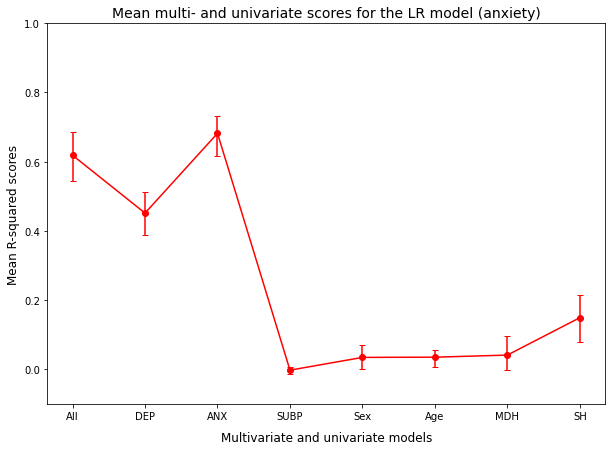

In [33]:
# Generate the plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

plt.errorbar(models, mean_scores, yerr=ci, fmt='-or', capsize=3)

ax = plt.gca()
ax.set_ylim(-0.1, 1)

plt.title('Mean multi- and univariate scores for the LR model (anxiety)', size=14)
plt.xlabel('Multivariate and univariate models', size=12, labelpad=10.0)
plt.ylabel('Mean R-squared scores', size=12)

plt.show()

##### Random forest regressor

In [34]:
# Obtain the univariate scores
ADEP_RF_score = []
AANX_RF_score = []
quar_RF_score = []
sex_RF_score = []
age_RF_score = []
ment_RF_score = []
suic_RF_score = []

# 'ADEPRESSION'
ADEP_RF = gs_RF.best_estimator_.fit(ADEP_X_train, np.ravel(ADEP_y_train)) #np.ravel(ADEP_y_train)

for i in range(100):
    ADEP_X_test_resampled, ADEP_y_test_resampled = resample(ADEP_X_test, ADEP_y_test, replace=True, n_samples=len(ADEP_y_test), random_state=0+i)
    ADEP_y_pred = ADEP_RF.predict(ADEP_X_test_resampled)
    ADEP_RF_score.append(r2_score(ADEP_y_test_resampled, ADEP_y_pred))

# 'AANXIETY'
AANX_RF = gs_RF.best_estimator_.fit(AANX_X_train, np.ravel(AANX_y_train))

for i in range(100):
    AANX_X_test_resampled, AANX_y_test_resampled = resample(AANX_X_test, AANX_y_test, replace=True, n_samples=len(AANX_y_test), random_state=0+i)
    AANX_y_pred = AANX_RF.predict(AANX_X_test_resampled)
    AANX_RF_score.append(r2_score(AANX_y_test_resampled, AANX_y_pred))

# 'quarantinesubperiod'
quar_RF = gs_RF.best_estimator_.fit(quar_X_train, np.ravel(quar_y_train))

for i in range(100):
    quar_X_test_resampled, quar_y_test_resampled = resample(quar_X_test, quar_y_test, replace=True, n_samples=len(quar_y_test), random_state=0+i)
    quar_y_pred = quar_RF.predict(quar_X_test_resampled)
    quar_RF_score.append(r2_score(quar_y_test_resampled, quar_y_pred)) 

# 'sex'
sex_RF = gs_RF.best_estimator_.fit(sex_X_train, np.ravel(sex_y_train))

for i in range(100):
    sex_X_test_resampled, sex_y_test_resampled = resample(sex_X_test, sex_y_test, replace=True, n_samples=len(sex_y_test), random_state=0+i)
    sex_y_pred = sex_RF.predict(sex_X_test_resampled)
    sex_RF_score.append(r2_score(sex_y_test_resampled, sex_y_pred)) 

# 'age'
age_RF = gs_RF.best_estimator_.fit(age_X_train, np.ravel(age_y_train))

for i in range(100):
    age_X_test_resampled, age_y_test_resampled = resample(age_X_test, age_y_test, replace=True, n_samples=len(age_y_test), random_state=0+i)
    age_y_pred = age_RF.predict(age_X_test_resampled)
    age_RF_score.append(r2_score(age_y_test_resampled, age_y_pred)) 

# 'mentdishist'
ment_RF = gs_RF.best_estimator_.fit(ment_X_train, np.ravel(ment_y_train))

for i in range(100):
    ment_X_test_resampled, ment_y_test_resampled = resample(ment_X_test, ment_y_test, replace=True, n_samples=len(ment_y_test), random_state=0+i)
    ment_y_pred = ment_RF.predict(ment_X_test_resampled)
    ment_RF_score.append(r2_score(ment_y_test_resampled, ment_y_pred))

# 'suic'
suic_RF = gs_RF.best_estimator_.fit(suic_X_train, np.ravel(suic_y_train))

for i in range(100):
    suic_X_test_resampled, suic_y_test_resampled = resample(suic_X_test, suic_y_test, replace=True, n_samples=len(suic_y_test), random_state=0+i)
    suic_y_pred = suic_RF.predict(suic_X_test_resampled)
    suic_RF_score.append(r2_score(suic_y_test_resampled, suic_y_pred))

print("Mean univariate scores for random forest regressor with 95% confidence intervals:")
print("    'ADEPRESSION' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ADEP_RF_score), np.percentile(ADEP_RF_score, 2.5), np.percentile(ADEP_RF_score, 97.5)))
print("    'AANXIETY' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(AANX_RF_score), np.percentile(AANX_RF_score, 2.5), np.percentile(AANX_RF_score, 97.5)))
print("    'quarantinesubperiod' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(quar_RF_score), np.percentile(quar_RF_score, 2.5), np.percentile(quar_RF_score, 97.5)))
print("    'sex' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(sex_RF_score), np.percentile(sex_RF_score, 2.5), np.percentile(sex_RF_score, 97.5)))
print("    'age' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(age_RF_score), np.percentile(age_RF_score, 2.5), np.percentile(age_RF_score, 97.5)))
print("    'mentdishist' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ment_RF_score), np.percentile(ment_RF_score, 2.5), np.percentile(ment_RF_score, 97.5)))
print("    'suic' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(suic_RF_score), np.percentile(suic_RF_score, 2.5), np.percentile(suic_RF_score, 97.5)))

Mean univariate scores for random forest regressor with 95% confidence intervals:
    'ADEPRESSION' R2 score: 0.43 [0.35, 0.51]
    'AANXIETY' R2 score: 0.68 [0.62, 0.73]
    'quarantinesubperiod' R2 score: -0.00 [-0.01, 0.01]
    'sex' R2 score: 0.03 [0.00, 0.07]
    'age' R2 score: -0.00 [-0.04, 0.04]
    'mentdishist' R2 score: 0.04 [-0.01, 0.09]
    'suic' R2 score: 0.15 [0.08, 0.21]


In [35]:
# Prepare the inputs for the plot
scores = [r2_RF, ADEP_RF_score, AANX_RF_score, quar_RF_score, sex_RF_score, age_RF_score, ment_RF_score, suic_RF_score]
models = ['All', 'DEP', 'ANX', 'SUBP', 'Sex', 'Age', 'MDH', 'SH']

mean_scores = []
ci_lower = []
ci_upper = []

for i in scores:
    mean_scores.append(np.mean(i))
    ci_lower.append(np.percentile(i, 2.5))
    ci_upper.append(np.percentile(i, 97.5))

ci_lower = [ci_lower]
ci_upper = [ci_upper]

ci_lower = np.array(mean_scores) - np.array(ci_lower)
ci_upper =np.array(ci_upper) - np.array(mean_scores)

ci = np.append(ci_lower, ci_upper, axis=0)

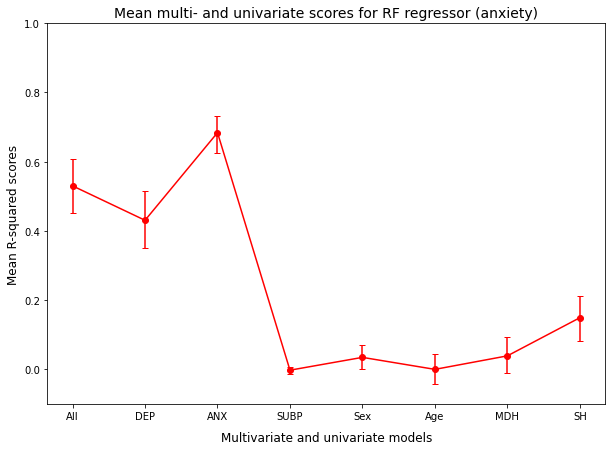

In [36]:
# Generate the plot
plt.figure(figsize=(10, 7))

plt.errorbar(models, mean_scores, yerr=ci, fmt='-or', capsize=3)

ax = plt.gca()
ax.set_ylim(-0.1, 1)

plt.title('Mean multi- and univariate scores for RF regressor (anxiety)', size=14)
plt.xlabel('Multivariate and univariate models', size=12, labelpad=10.0)
plt.ylabel('Mean R-squared scores', size=12)

plt.show()

##### SVM regressor

In [37]:
# Obtain the univariate scores
ADEP_SVR_score = []
AANX_SVR_score = []
quar_SVR_score = []
sex_SVR_score = []
age_SVR_score = []
ment_SVR_score = []
suic_SVR_score = []

# 'ADEPRESSION'
ADEP_SVR = gs_SVR.best_estimator_.fit(ADEP_X_train, np.ravel(ADEP_y_train)) #np.ravel(ADEP_y_train)

for i in range(100):
    ADEP_X_test_resampled, ADEP_y_test_resampled = resample(ADEP_X_test, ADEP_y_test, replace=True, n_samples=len(ADEP_y_test), random_state=0+i)
    ADEP_y_pred = ADEP_SVR.predict(ADEP_X_test_resampled)
    ADEP_SVR_score.append(r2_score(ADEP_y_test_resampled, ADEP_y_pred))

# 'AANXIETY'
AANX_SVR = gs_SVR.best_estimator_.fit(AANX_X_train, np.ravel(AANX_y_train))

for i in range(100):
    AANX_X_test_resampled, AANX_y_test_resampled = resample(AANX_X_test, AANX_y_test, replace=True, n_samples=len(AANX_y_test), random_state=0+i)
    AANX_y_pred = AANX_SVR.predict(AANX_X_test_resampled)
    AANX_SVR_score.append(r2_score(AANX_y_test_resampled, AANX_y_pred))

# 'quarantinesubperiod'
quar_SVR = gs_SVR.best_estimator_.fit(quar_X_train, np.ravel(quar_y_train))

for i in range(100):
    quar_X_test_resampled, quar_y_test_resampled = resample(quar_X_test, quar_y_test, replace=True, n_samples=len(quar_y_test), random_state=0+i)
    quar_y_pred = quar_SVR.predict(quar_X_test_resampled)
    quar_SVR_score.append(r2_score(quar_y_test_resampled, quar_y_pred)) 

# 'sex'
sex_SVR = gs_SVR.best_estimator_.fit(sex_X_train, np.ravel(sex_y_train))

for i in range(100):
    sex_X_test_resampled, sex_y_test_resampled = resample(sex_X_test, sex_y_test, replace=True, n_samples=len(sex_y_test), random_state=0+i)
    sex_y_pred = sex_SVR.predict(sex_X_test_resampled)
    sex_SVR_score.append(r2_score(sex_y_test_resampled, sex_y_pred)) 

# 'age'
age_SVR = gs_SVR.best_estimator_.fit(age_X_train, np.ravel(age_y_train))

for i in range(100):
    age_X_test_resampled, age_y_test_resampled = resample(age_X_test, age_y_test, replace=True, n_samples=len(age_y_test), random_state=0+i)
    age_y_pred = age_SVR.predict(age_X_test_resampled)
    age_SVR_score.append(r2_score(age_y_test_resampled, age_y_pred)) 

# 'mentdishist'
ment_SVR = gs_SVR.best_estimator_.fit(ment_X_train, np.ravel(ment_y_train))

for i in range(100):
    ment_X_test_resampled, ment_y_test_resampled = resample(ment_X_test, ment_y_test, replace=True, n_samples=len(ment_y_test), random_state=0+i)
    ment_y_pred = ment_SVR.predict(ment_X_test_resampled)
    ment_SVR_score.append(r2_score(ment_y_test_resampled, ment_y_pred))

# 'suic'
suic_SVR = gs_SVR.best_estimator_.fit(suic_X_train, np.ravel(suic_y_train))

for i in range(100):
    suic_X_test_resampled, suic_y_test_resampled = resample(suic_X_test, suic_y_test, replace=True, n_samples=len(suic_y_test), random_state=0+i)
    suic_y_pred = suic_SVR.predict(suic_X_test_resampled)
    suic_SVR_score.append(r2_score(suic_y_test_resampled, suic_y_pred))

print("Mean univariate scores for SVM regressor with 95% confidence intervals:")
print("    'ADEPRESSION' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ADEP_SVR_score), np.percentile(ADEP_SVR_score, 2.5), np.percentile(ADEP_SVR_score, 97.5)))
print("    'AANXIETY' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(AANX_SVR_score), np.percentile(AANX_SVR_score, 2.5), np.percentile(AANX_SVR_score, 97.5)))
print("    'quarantinesubperiod' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(quar_SVR_score), np.percentile(quar_SVR_score, 2.5), np.percentile(quar_SVR_score, 97.5)))
print("    'sex' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(sex_SVR_score), np.percentile(sex_SVR_score, 2.5), np.percentile(sex_SVR_score, 97.5)))
print("    'age' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(age_SVR_score), np.percentile(age_SVR_score, 2.5), np.percentile(age_SVR_score, 97.5)))
print("    'mentdishist' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(ment_SVR_score), np.percentile(ment_SVR_score, 2.5), np.percentile(ment_SVR_score, 97.5)))
print("    'suic' R2 score: {:.2f} [{:.2f}, {:.2f}]".format(np.mean(suic_SVR_score), np.percentile(suic_SVR_score, 2.5), np.percentile(suic_SVR_score, 97.5)))

Mean univariate scores for SVM regressor with 95% confidence intervals:
    'ADEPRESSION' R2 score: 0.46 [0.39, 0.53]
    'AANXIETY' R2 score: 0.69 [0.63, 0.74]
    'quarantinesubperiod' R2 score: 0.00 [-0.01, 0.01]
    'sex' R2 score: 0.04 [0.00, 0.07]
    'age' R2 score: 0.04 [0.00, 0.06]
    'mentdishist' R2 score: 0.03 [-0.03, 0.09]
    'suic' R2 score: 0.15 [0.06, 0.22]


In [38]:
# Prepare the inputs for the plot
scores = [r2_SVR, ADEP_SVR_score, AANX_SVR_score, quar_SVR_score, sex_SVR_score, age_SVR_score, ment_SVR_score, suic_SVR_score]
models = ['All', 'DEP', 'ANX', 'SUBP', 'Sex', 'Age', 'MDH', 'SH']

mean_scores = []
ci_lower = []
ci_upper = []

for i in scores:
    mean_scores.append(np.mean(i))
    ci_lower.append(np.percentile(i, 2.5))
    ci_upper.append(np.percentile(i, 97.5))

ci_lower = [ci_lower]
ci_upper = [ci_upper]

ci_lower = np.array(mean_scores) - np.array(ci_lower)
ci_upper =np.array(ci_upper) - np.array(mean_scores)

ci = np.append(ci_lower, ci_upper, axis=0)

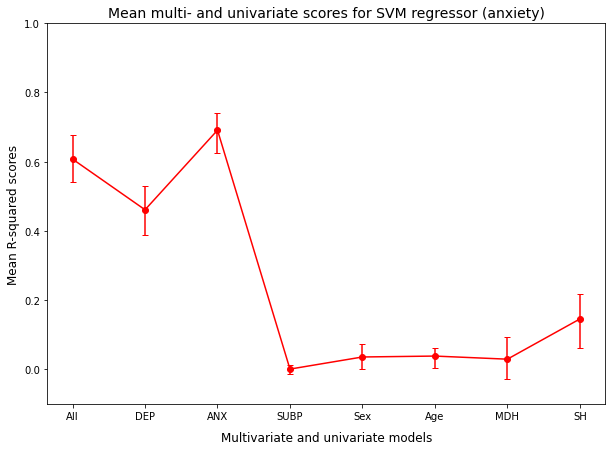

In [39]:
# Generate the plot
plt.figure(figsize=(10, 7))

plt.errorbar(models, mean_scores, yerr=ci, fmt='-or', capsize=3)

ax = plt.gca()
ax.set_ylim(-0.1, 1)

plt.title('Mean multi- and univariate scores for SVM regressor (anxiety)', size=14)
plt.xlabel('Multivariate and univariate models', size=12, labelpad=10.0)
plt.ylabel('Mean R-squared scores', size=12)

plt.show()